In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load Models ###
---

In [3]:
model_u_dr = load_model ('..\Multi_Class_Classification\models\model_u_dr.h5')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\pedro\AppData\Local\Temp\ipykernel_22552\3877133183.py:1: SyntaxWarning: invalid escape sequence '\M'
  model_u_dr = load_model ('..\Multi_Class_Classification\models\model_u_dr.h5')


In [4]:
model_u_dr_au = load_model ('..\Multi_Class_Classification\models\model_u_dr_au.h5')


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\pedro\AppData\Local\Temp\ipykernel_22552\3424490545.py:1: SyntaxWarning: invalid escape sequence '\M'
  model_u_dr_au = load_model ('..\Multi_Class_Classification\models\model_u_dr_au.h5')


### Create Test Datagen ###
---

In [10]:
test_fdr = r'..\Multi_Class_Classification\multi_class\test'
list  = ['Adenosis',
 'Ductal Carcinoma',
 'Fibroadenoma',
 'Lobular Carcinoma',
 'Mucinous Carcinoma',
 'Papillary Carcinoma',
 'Phyllodes Tumor',
 'Tubular Adenoma']

for i in list:
    ct = len(os.listdir(os.path.join(test_fdr, i)))
    print (f'{i} : {ct} images')

Adenosis : 66 images
Ductal Carcinoma : 518 images
Fibroadenoma : 152 images
Lobular Carcinoma : 94 images
Mucinous Carcinoma : 119 images
Papillary Carcinoma : 84 images
Phyllodes Tumor : 68 images
Tubular Adenoma : 86 images


In [11]:
test_fdr = r'..\Multi_Class_Classification\multi_class_undersampling\test'
list  = ['Adenosis',
 'Ductal Carcinoma',
 'Fibroadenoma',
 'Lobular Carcinoma',
 'Mucinous Carcinoma',
 'Papillary Carcinoma',
 'Phyllodes Tumor',
 'Tubular Adenoma']

for i in list:
    ct = len(os.listdir(os.path.join(test_fdr, i)))
    print (f'{i} : {ct} images')

Adenosis : 66 images
Ductal Carcinoma : 518 images
Fibroadenoma : 152 images
Lobular Carcinoma : 94 images
Mucinous Carcinoma : 119 images
Papillary Carcinoma : 84 images
Phyllodes Tumor : 68 images
Tubular Adenoma : 86 images


Images were well copied in the undersampling process

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_dir = r'..\Multi_Class_Classification\multi_class_undersampling\test'
test_generator = test_datagen.flow_from_directory( 
    test_dir,           
    target_size=(224,224), 
    batch_size=20,  
    class_mode='categorical',
    shuffle = False
)

Found 1187 images belonging to 8 classes.


In [13]:
model_u_dr_au.evaluate(test_generator)

c:\Users\pedro\Desktop\Breast-Cancer-Detection\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 546ms/step - accuracy: 0.6487 - auc_1: 0.9363 - loss: 1.8233 - precision_1: 0.6865 - recall_1: 0.5830


[1.823348879814148,
 0.6486941576004028,
 0.6865079402923584,
 0.5829823017120361,
 0.9363187551498413]

In [14]:
predictions_u_dr_au = model_u_dr_au.predict(test_generator)

60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 522ms/step


In [15]:
y_true_u_dr_au = test_generator.classes  #Actual Labels
y_pred_u_dr_au = np.argmax(predictions_u_dr_au, axis =1)  #Get class with highest probability

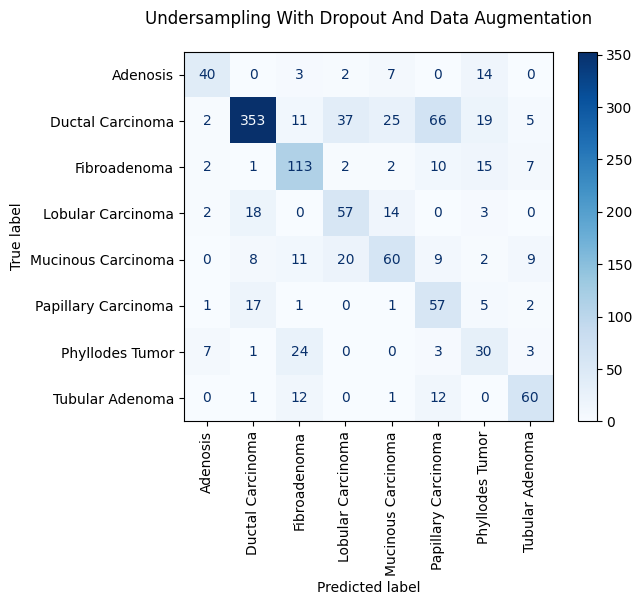

In [19]:
cm = confusion_matrix(y_true_u_dr_au, y_pred_u_dr_au)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues')  

plt.title ('Undersampling With Dropout And Data Augmentation', pad=20)
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.show()

In [20]:
model_u_dr.evaluate(test_generator)

60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 528ms/step - accuracy: 0.6386 - auc: 0.9309 - loss: 2.1545 - precision: 0.6799 - recall: 0.6066


[2.154480218887329,
 0.6385846734046936,
 0.6798866987228394,
 0.6065711975097656,
 0.9308628439903259]

In [21]:
predictions_u_dr= model_u_dr.predict(test_generator)

60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 548ms/step


In [23]:
y_true_u_dr = test_generator.classes  #Actual Labels
y_pred_u_dr = np.argmax(predictions_u_dr, axis =1)  #Get class with highest probability

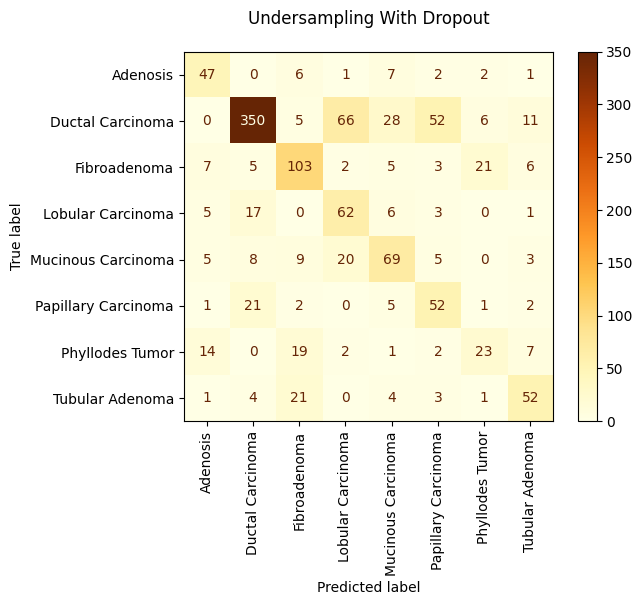

In [24]:
cm_2 = confusion_matrix(y_true_u_dr, y_pred_u_dr)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=test_generator.class_indices.keys())
disp_2.plot(cmap='YlOrBr')  

plt.title ('Undersampling With Dropout', pad=20)
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.show()

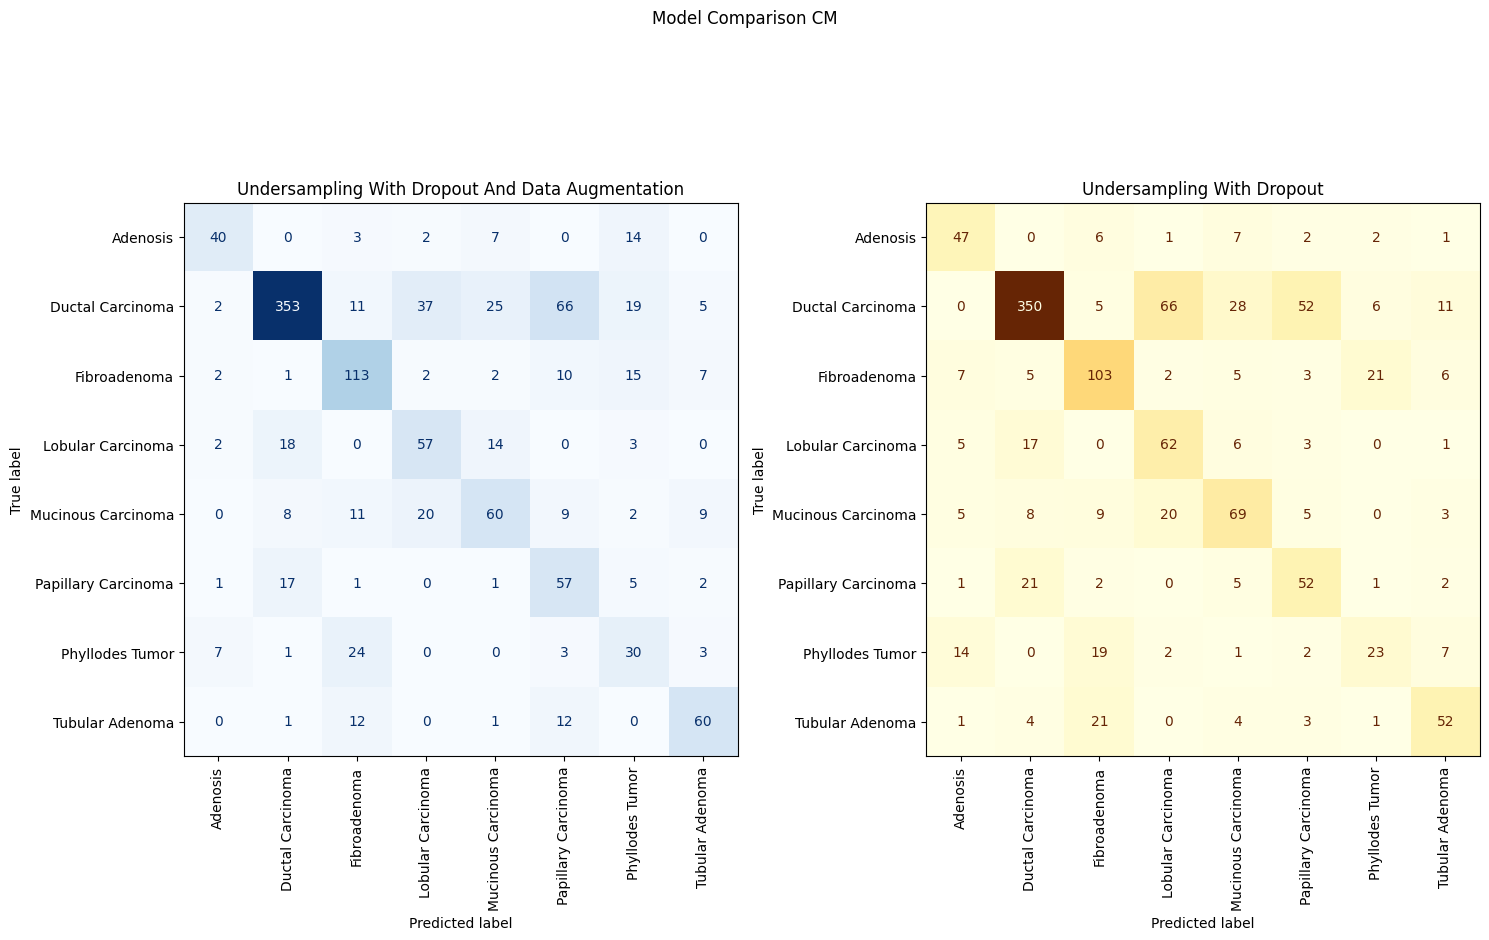

In [32]:
fig, axes = plt.subplots (nrows = 1, ncols=2, figsize =(15,10))

disp.plot(cmap = 'Blues', ax = axes[0], colorbar=False)
axes[0].set_title('Undersampling With Dropout And Data Augmentation')
axes[0].tick_params(axis='x', rotation=90)
axes[0].tick_params(axis='y', rotation=0) 

disp_2.plot(cmap = 'YlOrBr', ax = axes[1], colorbar=False)
axes[1].set_title('Undersampling With Dropout')
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', rotation=0)

fig.suptitle('Model Comparison CM')
plt.tight_layout()
plt.show()

In [33]:
fig.savefig("Model Comparison CM.png", dpi=300, bbox_inches='tight')

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

In [36]:
metrics = {
    "Model": ["Undersampling", "Undersampling + Data Augmentation"],
    "Accuracy": [
        accuracy_score(y_true_u_dr, y_pred_u_dr),
        accuracy_score(y_true_u_dr_au, y_pred_u_dr_au)
    ],
    "Recall": [
        recall_score(y_true_u_dr, y_pred_u_dr, average='macro'),
        recall_score(y_true_u_dr_au, y_pred_u_dr_au, average='macro')
    ],
    "Precision": [
        precision_score(y_true_u_dr, y_pred_u_dr, average='macro'),
        precision_score(y_true_u_dr_au, y_pred_u_dr_au, average='macro')
    ],
    "AUC": [
        roc_auc_score(
            y_true=np.eye(8)[y_true_u_dr],  # one-hot encode true labels
            y_score=predictions_u_dr, 
            average='macro', multi_class='ovr'
        ),
        roc_auc_score(
            y_true=np.eye(8)[y_true_u_dr_au],
            y_score=predictions_u_dr_au,
            average='macro', multi_class='ovr'
        )
    ]
}

In [37]:
df_metrics = pd.DataFrame(metrics)

In [38]:
df_metrics

,Model,Accuracy,Recall,Precision,AUC
0,Undersampling,0.638585,0.608346,0.563979,0.931534
1,Undersampling + Data Augmentation,0.648694,0.619869,0.587664,0.933312
